In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import Image

In [ ]:
def load_data(input_folder):
    # for each folder (holding a different set of letters)
    X = []
    labels = []
    for directory in os.listdir(input_folder):
        # for each image
        for image in os.listdir(input_folder + '/' + directory):
            # open image and load array data
            try:
                file_path = input_folder + '/' + directory + '/' + image
                img = Image.open(file_path)
                img.load()
                img_data = np.asarray(img, dtype=np.int16)
                # add image to dataset
                X.append(img_data.flatten())
                # add label to labels
                labels.append(directory)
            except:
                None # do nothing if couldn't load file
    
#     N = len(X) # number of images
#     img_size = len(X[0]) # width of image
    return np.asarray(X), labels
#     X = np.asarray(X).reshape(N, img_size, img_size,1) # add our single channel for processing purposes
#     labels = to_categorical(list(map(lambda x: ord(x)-ord('A'), labels)), 10) # convert to one-hot

In [ ]:
input_dir = '../input/notmnist/notMNIST_small/notMNIST_small'
# input_dir = '../input/notmnist/notMNIST_large/notMNIST_large'

In [ ]:
def prepare_csv(input_folder, output):
    X, labels = load_data(input_folder)
    data = pd.DataFrame(X)
    data['labels'] = labels
    data.to_csv(output)

In [ ]:
prepare_csv(input_dir, 'notmnist_test.csv')

In [2]:
input_data = pd.read_csv('notmnist_test.csv')

In [3]:
input_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,1,0,0,0,0,0,0,0,...,188,149,108,54,6,0,0,2,3,E
1,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,254,255,202,E
2,2,0,5,0,146,255,250,255,255,255,...,255,255,255,255,254,255,39,0,2,E
3,3,0,61,255,255,254,255,255,255,255,...,255,255,255,255,254,254,255,63,0,E
4,4,58,243,255,254,255,255,255,254,251,...,255,255,255,253,255,120,0,3,0,E


In [4]:
X = input_data.iloc[:, 1:785].to_numpy()
labels = input_data['labels'].to_numpy()

In [5]:
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
def display_images(X):
    num_rows, num_cols = 3, 5
    fig, axes = plt.subplots(num_rows, num_cols)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i, j].imshow(X[num_cols*i + j, :].reshape((28, 28)), cmap='gray')
            axes[i, j].axis('off')
    fig.suptitle('Sample Images from Dataset')
    plt.show()

In [7]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = enc.fit_transform(labels.reshape(-1, 1))
print(f'For label - {labels[0]} encoded class - {y[0]}')

For label - E encoded class - [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, stratify=labels)

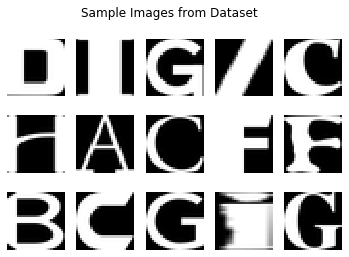

In [9]:
display_images(X_train)

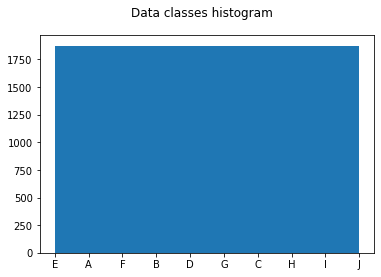

In [10]:
plt.figure()
plt.suptitle('Data classes histogram')
res = plt.hist(labels, bins=10)
plt.show()